In [1]:
import os
import dill

import numpy as np
from matplotlib import pyplot as plt

import TwoPUtils
import STX3KO_analyses as stx


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
def update_sess_dict(mouse, f, KO = True):
    scan_str = "%s_%03d_%03d" % (f['scene'],f['session'],f['scan'])

    source_folder = "/mnt/BigDisk/2P_scratch"
    source_stem = os.path.join(source_folder, mouse, f['date'], f['scene'], scan_str)

    f['mouse']=mouse
    f.update({'vr_filename': os.path.join("/home/mplitt/VR_scratch",f['mouse'],f['date'],"%s_%d.sqlite" %(f['scene'],f['session'])),
              'scan_number': f['scan'],
              'prompt_for_keys': False,
              'VR_only': True,
              'scanner': "NLW",
             })
    return f

In [3]:
ko_sessions = stx.ymaze_sess_deets.KO_behavior_sessions
ctrl_sessions = stx.ymaze_sess_deets.CTRL_behavior_sessions

In [6]:
def run_and_save(fdict,comb_frames=0):

            
    sess = stx.session.YMazeSession(**fdict)
    sess.align_VR_to_2P()
    sess.get_trial_info()
    
    sess.add_timeseries(speed_raw=sess.vr_data['dz']._values)
    sess.add_pos_binned_trial_matrix('speed_raw')
    
    sess.add_timeseries(speed=sess.vr_data['dz']._values)
    sess.add_pos_binned_trial_matrix('speed') #, speed_thr=.01, speed = sess.timeseries['speed_raw'].ravel())
    
    sess.add_timeseries(licks_rate=sess.vr_data['lick']._values)
    sess.add_pos_binned_trial_matrix('licks_rate',speed_thr=.01, speed = sess.timeseries['speed_raw'].ravel())
    
    sess.add_timeseries(licks=sess.vr_data['lick']._values)
    sess.timeseries['licks'][sess.timeseries['licks']>1]=1
    sess.add_pos_binned_trial_matrix('licks')
    
    licks = np.copy(sess.timeseries['licks'])
    licks[licks>1]=1
    time = sess.vr_data['time']

    reward_inds = np.argwhere(sess.vr_data['reward']._values==1).ravel()
    for r in reward_inds:
        licks[0,((time-time[r])>=0)&((time-time[r])<2)] = 0

    sess.add_timeseries(nonconsum_licks = licks)
    sess.add_pos_binned_trial_matrix('nonconsum_licks')
    
    sess.add_timeseries(licks_sum=licks)
    sess.add_pos_binned_trial_matrix('licks_sum',sum=True)

    
    TwoPUtils.sess.save_session(sess,'/home/mplitt/YMaze_VR_Pkls')
    return comb_frames+sess.vr_data.shape[0]


In [7]:
for d in (ko_sessions, ctrl_sessions):
    
    for mouse, sess_list in d.items():
        print(mouse)
        for f in sess_list:
            if isinstance(f,dict):
                f_ = update_sess_dict(mouse,f)
                print(mouse, f_)
                _ = run_and_save(f_)
            elif isinstance(f, tuple) or isinstance(f, list):
                comb_frames = 0
                for _f in f:
                    
                    f_ = update_sess_dict(mouse,_f)
                    print(mouse, f_)
                    comb_frames = run_and_save(f_,comb_frames=comb_frames)


4467975.1
4467975.1 {'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0, 'mouse': '4467975.1', 'vr_filename': '/home/mplitt/VR_scratch/4467975.1/28_09_2020/YMaze_LNovel_1.sqlite', 'scan_number': 3, 'prompt_for_keys': False, 'VR_only': True, 'scanner': 'NLW'}
Fixing teleports
4467975.1 {'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1, 'mouse': '4467975.1', 'vr_filename': '/home/mplitt/VR_scratch/4467975.1/28_09_2020/YMaze_LNovel_6.sqlite', 'scan_number': 14, 'prompt_for_keys': False, 'VR_only': True, 'scanner': 'NLW'}
Fixing teleports
4467975.1 {'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 2, 'mouse': '4467975.1', 'vr_filename': '/home/mplitt/VR_scratch/4467975.1/29_09_2020/YMaze_LNovel_1.sqlite', 'scan_number': 3, 'prompt_for_keys': False, 'VR_only': True, 'scanner': 'NLW'}
Fixing teleports
4467975.1 {'date': '30_09_2020'

In [14]:
basedir = "/home/mplitt/YMaze_VR_Pkls"

mouse = 'Cre9'
f_dict = ko_sessions[mouse][-1]
print(f_dict[0])
f = f_dict[1]

file = os.path.join(basedir, mouse, f['date'], "%s_%d.pkl" % (f['scene'], f['session']))
sess = stx.session.YMazeSession.from_file(file)

{'date': '24_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6, 'mouse': 'Cre9', 'vr_filename': '/home/mplitt/VR_scratch/Cre9/24_10_2021/YMaze_LNovel_1.sqlite', 'scan_number': 3, 'prompt_for_keys': False, 'VR_only': True, 'scanner': 'NLW'}


In [11]:
sess.trial_matrices.keys()

dict_keys(['licks', 'bin_edges', 'bin_centers', 'speed'])

In [12]:
sess.trial_info['LR']

array([ 1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,
       -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        1., -1.])

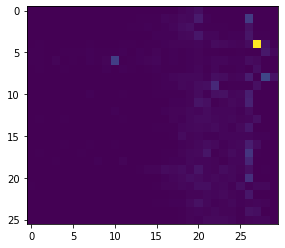

In [13]:
fig, ax = plt.subplots()
ax.imshow(sess.trial_matrices['licks'][sess.trial_info['LR']==-1])